# 18.065 Problem Set 5 Solutions



## Problem 1 (5+6 points)

Consider the following optimization problem:
$$
\min_{x \in \mathbb{R}^2} x_1 \\
\mbox{  subject to } x_2 \le x_1^3 \mbox{ and } x_2 \ge 0 \, .
$$

**(a)** Draw a sketch of the feasible set in the $x_1, x_2$ plane and indicate the optimum $x_*$.

**(b)** Show that the optimum $x_*$ does *not* satisfy the KKT conditions, but explain why this is possible because the LICQ conditions are violated (see the last slide of lecture 22).

(Most problems have local minima that satisfy KKT, but you can see from the picture in (a) that this is a weird case!)

### Solution:

**(a)** We will use PyPlot to draw our feasible set as a light-blue shaded region, which lies below the cubic $x_2 = x_1^3$ and above the $x_2=0$ axis, and hence is a **cusp-like** region that **only includes** $x_1 \ge 0$.

We also the primal optimum $x_*$ as a red star, which lies at $\boxed{x_1 = 0, x_2 = 0}$, since this is the smallest $x_1$ point in the feasible region.

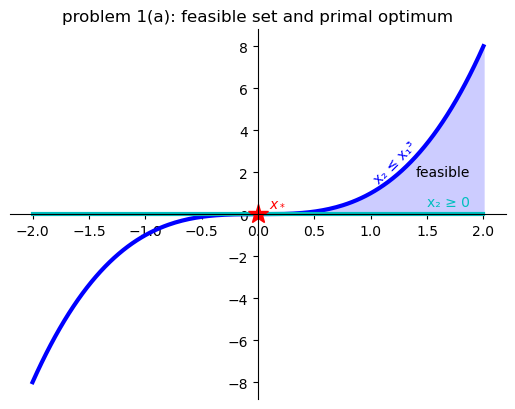

In [1]:
using PyPlot

# plot constraints
x₁ = range(-2,2,length=200)
plot(x₁, x₁.^3, "b-", linewidth=3)
text(1, 1.5, "x₂ ≤ x₁³", color="b", rotation=45)
plot(x₁, zero(x₁), "c-", linewidth=3)
text(1.5, 0.4, "x₂ ≥ 0", color="c")

# plot feasible set
x₁⁺ = range(0,2,length=100)
fill_between(x₁⁺, zero(x₁⁺), x₁⁺.^3, color=(0.8,0.8,1))
text(1.4, 1.8, "feasible")

# plot optimum
plot([0],[0],"r*",markersize=15)
text(0.1,0.4,L"x_*",color="r")

title("problem 1(a): feasible set and primal optimum")

# center the axes:
ax = gca()
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_color("none")

**(b)** Our objective is $f_0(x) = x_1$, and our two constraints $f_i(x) \le 0$ are $f_1(x) = x_2 - x_1^3$ and $f_2(x) = -x_2$.  Therefore, at the optimum $x_* = (0,0)$, their gradients are:
$$
\left. \nabla f_0 \right|_{x_*} = (1,0), \qquad
\left. \nabla f_1 \right|_{x_*} = (0,1), \qquad
\left. \nabla f_2 \right|_{x_*} = (0,-1) \, .
$$
These are depicted graphically on the diagram below.

But these **cannot possibly** satisfy the KKT condition $\boxed{\nabla L = 0}$ (for the Lagrangian $L = f_0 + \lamba_1 f_1 + \lambda_2 f_2$), for **any** Lagrange multipliers $\lambda_1, \lambda_2$, because $\nabla f_0$ is **linearly independent of** (*orthogonal* to!) $\nabla f_1$ and $\nabla f_2$!

It is possible to violate the KKT conditions at $x_*$ in this problem because the optimum **violates LICQ**: the constraint gradients $\nabla f_1$ and $\nabla f_2$ are linearly dependent (anti-parallel!) at $x_*$.

This happens because the feasible set **has a cusp** (where two constraints become parallel) right at the primal optimum.   Obviously, this is an odd case that doesn't arise too often in practice — most optimization problems typically satisfy LICQ and KKT conditions at any local optimum.

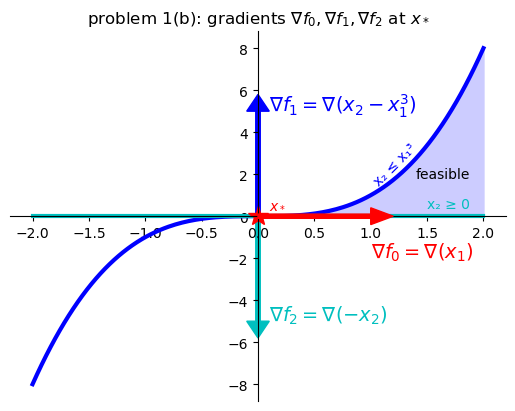

In [2]:
# plot constraints
x₁ = range(-2,2,length=200)
plot(x₁, x₁.^3, "b-", linewidth=3)
text(1, 1.5, "x₂ ≤ x₁³", color="b", rotation=45)
plot(x₁, zero(x₁), "c-", linewidth=3)
text(1.5, 0.4, "x₂ ≥ 0", color="c")

# plot feasible set
x₁⁺ = range(0,2,length=100)
fill_between(x₁⁺, zero(x₁⁺), x₁⁺.^3, color=(0.8,0.8,1))
text(1.4, 1.8, "feasible")

# plot optimum
plot([0],[0],"r*",markersize=15)
text(0.1,0.4,L"x_*",color="r")

title(L"problem 1(b): gradients $\nabla f_0, \nabla f_1, \nabla f_2$ at $x_*$")


# gradients
arrow(0,0,0,5,color="b", width=0.04, head_width=0.2, head_length=0.8)
text(0.1, 5, L"\nabla f_1 = \nabla (x_2 - x_1^3)", color="b", fontsize=14)

arrow(0,0,0,-5,color="c", width=0.04, head_width=0.2, head_length=0.8)
text(0.1, -5, L"\nabla f_2 = \nabla (-x_2)", color="c", fontsize=14)

arrow(0,0,1,0,color="r", width=0.2, head_width=0.8, head_length=0.2, zorder=10)
text(1, -2, L"\nabla f_0 = \nabla (x_1)", color="r", fontsize=14)

# center the axes:
ax = gca()
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_color("none")

## Problem 2 (6+6+6 points)

Consider the convex problem:
$$
\min_{x\in \mathbb{R}^n} \Vert b - Ax \Vert_2^2 \\
\mbox{  subject to } \Vert x \Vert_2^2 \le r^2
$$
for some $r > 0$, $m \times n$ matrix $A$ (of rank $n$), and $b \in \mathbb{R}^m$ — that is, least-squares optimization with the solution constrained to lie inside a sphere of radius $r$.

**(a)** What is the Lagrange dual function $g(\lambda)$?   (You can give a closed-form expression.  Hint: review Tikhonov-regularized least-squares.)   Define a corresponding Julia function `g(λ; r=1.0)` for the sample parameters given below (this syntax defines an optional keyword argument `r` that defaults to $r=1$).  Make a plot of $g(\lambda)$ for $r=1$ and $r=0.5$ for $\lambda \ge 0$ to verify that it looks concave with a single maximum.

**(b)** If the unconstrained least-square solution $\hat{x} = (A^T A)^{-1} A^T b$ satisfies $\Vert \hat{x} \Vert_2 < r$, then what must be true of the derivative $g'(0)$?  What if $\Vert \hat{x} \Vert_2 > r$?

Check in Julia that $g'(0)$ matches your expectations by computing the derivative using automatic differentiation:
```jl
using ForwardDiff
dgdλ(λ; r=1.0) = ForwardDiff.derivative(λ -> g(λ; r=r), λ)
```
and evaluating it at `dgdλ(0; r=???)` for two values of `r`: one $r > \Vert \hat{x} \Vert_2$ (so that the constraint is inactive) and one $r < \Vert \hat{x} \Vert_2$ (so that the constraint is active).

(In principle, you could take this derivative by hand using matrix calculus, but it's pretty error-prone.)

**(c)** You can take the *second* derivative of $g(\lambda)$ via AD by:
```jl
d²gdλ²(λ; r=0.5) = ForwardDiff.derivative(λ -> dgdλ(λ; r=0.5), λ)
```
Use this to implement a Newton iteration to maximize $g(\lambda)$ (for $\lambda \ge 0$) by finding a root of $g'(\lambda)$, starting with an initial guess of $\lambda=0$, for $r = 0.5$.  (It should converge in only a few iterations.  The solution should have $\lambda > 0$ in this case because ...?)   To at least 8 significant digits, give the resulting dual optimum $\lambda_*$ and the primal optimum $x_*$ (strong duality holds in this convex problem!), and check that $x_*$ is feasible.

### Solution:

**(a)** The dual function $g(\lambda)$ is the found by minimizing the Lagrangian over $x$, i.e.
$$
g(\lambda) = \min_x \underbrace{\left[ \Vert b - Ax \Vert_2^2 + \lambda (\Vert x \Vert_2^2 - r^2) \right]}_{L(x,\lambda)}
$$
where $\Vert x \Vert_2^2 - r^2 \le 0$ is our inequality constraint.  But this is exactly in the form of Tikhonov-regularized least-squares (plus a constant $-\lambda r^2$), so we know from class that the solution is
$$
\hat{x}_\lambda = (A^T A + \lambda I)^{-1} (A^T b)
$$
and hence $g(\lambda) = \boxed{L(\hat{x}_\lambda, \lambda)}$ in terms of the formulas above.   We can implement this as follows:

In [3]:
using LinearAlgebra

m = 5
n = 4
A = [ -9   2  -2   3
      -5  -3   9   3
      -1  -6   9  -2
      -3  -4   5   4
      -8   9  -6   4 ]
b = [1,2,3,4,5];

In [4]:
function g(λ; r=1)
    x̂_λ = (A'A + λ*I) \ (A'b)
    return norm(b - A*x̂_λ)^2 + λ*(norm(x̂_λ)^2 - r^2)
end

g (generic function with 1 method)

Plotting it, we obtain:

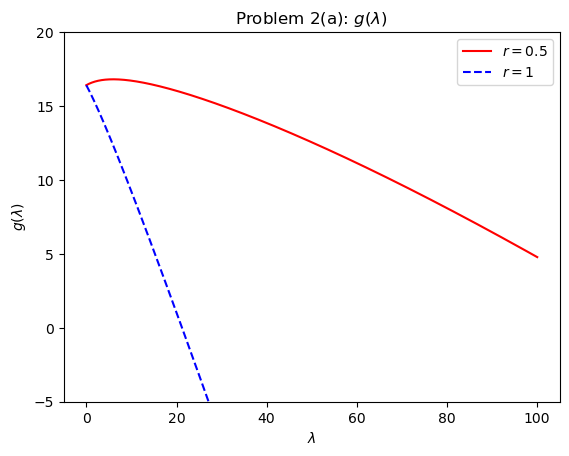

(-5.0, 20.0)

In [5]:
using PyPlot
λ = range(0,100, length=1000)
plot(λ, g.(λ, r=0.5), "r-")
plot(λ, g.(λ, r=1), "b--")
title(L"Problem 2(a): $g(\lambda)$")
xlabel(L"\lambda")
ylabel(L"g(\lambda)")
legend([L"r=0.5", L"r=1"])
ylim(-5, 20)

**(b)** If the unconstrained least-square solution satisfies the constraint, then the constraint is **inactive** and we expect that the corresponding Lagrange multiplier λ should be **zero** (corresponding to the "complementary slackness" KKT condition).  In the dual problem, this corresponds to $$g(\lambda)$$ for $$\lambda \ge 0$$ having its maximum at $\lambda = 0$, corresponding to $\boxed{g'(0) < 0}$ for $\Vert \hat{x} \Vert_2 < r$.

Conversely, if $\Vert \hat{x} \Vert_2 > r$, then the constraint is **active** and we expect a dual maximum for $\lambda > 0$, which requires $\boxed{g'(0) > 0}$ in that case.

To get an example of this, let's check the norm of the unconstrained least-square solution:

In [6]:
norm(A \ b)

0.6508599263498679

i.e. $\Vert \hat{x} \Vert_2 = \Vert (A^T A)^{-1} A^T b \Vert_2 \approx 0.651$, so the constraint should be inactive for any radius larger than that.

For example, the constraint should be *inactive* for $r=1$ and *active* for $r = 0.5$, and we can see by inspection of the plot from part (a) that $g'(0)$ is $< 0$ and $> 0$ in these two cases, respectively.  Quantitatively, we can use AD to get the derivative as suggested:

In [7]:
using ForwardDiff
dgdλ(λ; r=1.0) = ForwardDiff.derivative(λ -> g(λ; r=r), λ)

@show dgdλ(0; r=1.0)
@show dgdλ(0; r=0.5)

dgdλ(0; r = 1.0) = -0.5763813562718445
dgdλ(0; r = 0.5) = 0.17361864372815555


0.17361864372815555

Hurray, the signs match our expectations!

**(c)** As suggested, we can get a second derivative by:

In [8]:
d²gdλ²(λ; r=0.5) = ForwardDiff.derivative(λ -> dgdλ(λ; r=0.5), λ)

d²gdλ² (generic function with 1 method)

We can use this to implement a Newton iteration for the dual optimum.  A Newton iteration to find a maximum $g'(\lambda) = 0$ is just
$$
\lambda \longleftarrow \lambda - \frac{g'(\lambda)}{g''(\lambda)}
$$
We can start at $\lambda = 0$.  Of course, we first check whether $g'(0) > 0$ to be sure the constraint is active; otherwise, the dual optimum is simply $\lambda = 0$.

Given the dual optimum $\lambda_*$, by strong duality we then have the corresponding primal optimum $x_* = \hat{x}_{\lambda_*}$ from part (a).

In [9]:
# find the dual optimum (maximizing g(λ))
# and return the dual and primal optima λ,x
function dualopt(r; rtol=10*eps(Float64), maxiter=100)
    λ = zero(rtol)
    g′ = dgdλ(λ; r=r)
    if g′ > 0 # active constraint
        for iter=1:maxiter # Newton iterations
            g″ = d²gdλ²(λ; r=r)
            @show Δλ = g′ / g″
            λ -= Δλ
            abs(Δλ) ≤ rtol * abs(λ) && break # converged
            g′ = dgdλ(λ; r=r)
        end
    end
    x̂_λ = (A'A + λ*I) \ (A'b) # primal optimum x
    return λ, x̂_λ
end

dualopt (generic function with 1 method)

For $r = 0.5$, this gives (to nearly machine precision in only 7 Newton steps!)

In [10]:
@show λ_opt, x_opt = dualopt(0.5)

Δλ = g′ / g″ = -2.976939515696773
Δλ = g′ / g″ = -2.197446051423321
Δλ = g′ / g″ = -0.7226090155288597
Δλ = g′ / g″ = -0.053830681767815296
Δλ = g′ / g″ = -0.000263613901856008
Δλ = g′ / g″ = -6.262750976944395e-9
Δλ = g′ / g″ = -2.9522501729702895e-15
(λ_opt, x_opt) = dualopt(0.5) = (5.951088884581378, [-0.2084478531413324, 0.23289743085848733, 0.29901616790443714, 0.25079396035796236])


(5.951088884581378, [-0.2084478531413324, 0.23289743085848733, 0.29901616790443714, 0.25079396035796236])

i.e. $\boxed{\lambda_* \approx 5.951088884581378}$ and
$\boxed{x_* \approx [-0.2084478531413324, 0.23289743085848733, 0.29901616790443714, 0.25079396035796236]}$.

We should also check that $x_*$ is feasible, and in fact that the constraint is active ($\Vert x_* \Vert_2 = r$) since $\lambda_* > 0$:

In [11]:
norm(x_opt)

0.5000000000000001

Yes, it is feasible and the constraint is active (up to roundoff errors).

## Problem 3 (5+5+6 points)

In this problem, you will use ADMM to solve the (primal) optimization problem from problem 2 above, for the parameters from problem 2c, using the equivalent formulation:
$$
\min_{x \in \mathbb{R}^n} \left( \Vert b - Ax \Vert_2^2 + \begin{cases} 0 & \Vert x \Vert_2 \le r \\ \infty & \mbox{otherwise} \end{cases} \right)
$$
where the second term is the "indicator" function of the feasible set (the radius-$r$ ball) as in lecture 24 and section III.4 of the text.

A basic iteration of ADMM consists of 3 steps, as described in class and in the textbook:

1. $x^{(k+1)} = \mbox{arg }\min_x \Vert b - Ax \Vert_2^2  + \frac{\rho}{2} \Vert x - z^{(k)} + s^{(k)} \Vert_2^2$ (for some penalty parameter $\rho > 0$)
2. $z^{(k+1)}$ is the projection of $x^{(k+1)} + s^{(k)}$ onto the *closest* point in the feasible set.
3. $s^{(k+1)} = s^{(k)} + x^{(k+1)} - z^{(k+1)}$

**(a)** Give a closed-form solution for step 1.  (Hint: a problem from pset 3 should be helpful.)

**(b)** Give a closed-form solution for step 2.

**(c)** Implement this iteration in Julia to solve this problem with the parameters from 2c above, starting from $x = z = s = \vec{0}$.   Make a (semi-log) plot of the error $\Vert x^{(k)} - x_* \Vert_2$ versus $k$, where $x_*$ is your solution from 2c, for $\rho = 1$ and $\rho = 10$.  (The error should converge to zero!)

### Solution:

**(a)** This is essentiallly the same as problem 3 of pset 3, with the "prior" $x_p = z^{(k)} - s^{(k)}$ and a penalty strength $\delta^2 = \rho/2$.  Quoting the solutions from pset 3, we then have:
$$
\boxed{x^{(k+1)} = \left(A^T A + \frac{\rho}{2} I\right)^{-1} \left[A^T b + \frac{\rho}{2} (z^{(k)} - s^{(k)}) \right]}
$$

**(b)** To find the closest point to a vector $v$ on a sphere of radius $r$, if $\Vert v \Vert_2 > r$ we simply shrink $v$ onto the sphere: $v \to v r / \Vert v \Vert_2$.  This gives:

$$
\boxed{z^{(k+1)} =  \underbrace{\left( x^{(k+1)} + s^{(k)} \right)}_{v^{(k)}} \frac{\min \{r, \Vert v^{(k)} \Vert_2\}}{\Vert v^{(k)} \Vert_2} }
$$
where the second term shrinks the length if it is $> r$.  (You can write this in other ways, of course, e.g. as an "if–then" statement.)

**(c)** We'll implement a function `x,z,s = ADMM(x,z,s)` to take an ADMM step using the formulas above, and then iterate it for 1000 iterations and plot the convergence towards the optimum `x_opt` from problem 2(c) above:

In [12]:
# perform 1 ADMM step, returning the new x,z,s vectors
function ADMM(x,z,s; r=0.5, ρ=1)
    x = (A'A + (ρ/2)*I) \ (A'b + (ρ/2)*(z - s))
    v = x + s
    vlen = norm(v)
    z = vlen ≤ r ? v : v * r/vlen
    s = s + x - z
    return x,z,s
end

ADMM (generic function with 1 method)

In [13]:
x = z = s = zeros(n)
err1 = [norm(x - x_opt)]
for i = 2:1000
    x,z,s = ADMM(x,z,s; ρ=1)
    push!(err1, norm(x - x_opt))
end

x = z = s = zeros(n)
err10 = [norm(x - x_opt)]
for i = 2:1000
    x,z,s = ADMM(x,z,s; ρ=10)
    push!(err10, norm(x - x_opt))
end

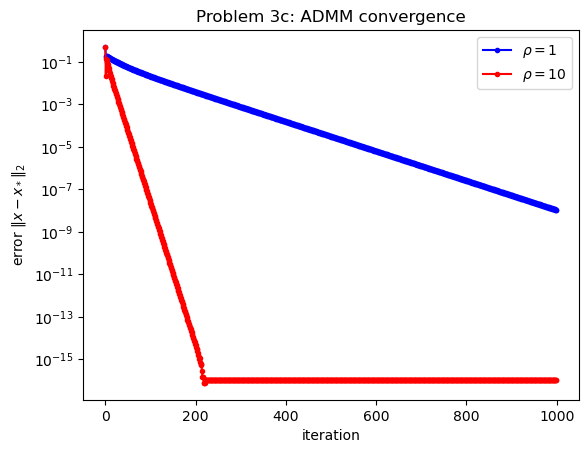

PyObject <matplotlib.legend.Legend object at 0x295a97af0>

In [14]:
semilogy(err1, "b.-")
semilogy(err10, "r.-")
xlabel("iteration")
ylabel(L"error $\Vert x - x_*\Vert_2$")
title("Problem 3c: ADMM convergence")
legend([L"\rho = 1", L"\rho = 10"])

As desired, the error is clearly converging towards zero — ADMM is converging towards the same solution as 2(c) above.

Of course, it's not converging nearly as fast as a Newton iteration on the dual problem.  In this problem, $\rho = 10$ is converging significantly faster than $\rho = 1$.  

**Optional commentary:**

However, it's not simply a case of "bigger is better".  For any given problem, there is an optimum $\rho$ for ADMM convergence.  Here, if we increase to $\rho = 100$ the convergence is better, but if we go to $\rho = 1000$ it gets *worse*.  (You were not required to investigate this, however.)  This kind of hyper-parameter tuning is painful to do by hand; a more sophisticated approach might be to try to update $\rho$ dynamically depending on the convergence of the objective function and the constraint.

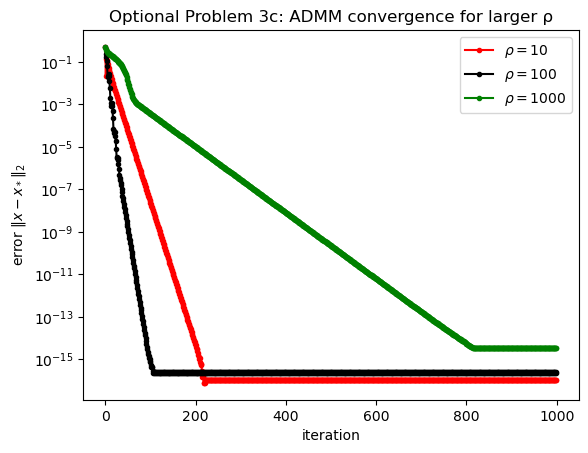

PyObject <matplotlib.legend.Legend object at 0x29798e580>

In [15]:
x = z = s = zeros(n)
err100 = [norm(x - x_opt)]
for i = 2:1000
    x,z,s = ADMM(x,z,s; ρ=100)
    push!(err100, norm(x - x_opt))
end

x = z = s = zeros(n)
err1000 = [norm(x - x_opt)]
for i = 2:1000
    x,z,s = ADMM(x,z,s; ρ=1000)
    push!(err1000, norm(x - x_opt))
end

semilogy(err10, "r.-")
semilogy(err100, "k.-")
semilogy(err1000, "g.-")
xlabel("iteration")
ylabel(L"error $\Vert x - x_*\Vert_2$")
title("Optional Problem 3c: ADMM convergence for larger ρ")
legend([L"\rho = 10", L"\rho = 100", L"\rho = 1000"])